In [1]:
import requests
import getpass

In [2]:
p = getpass.getpass(prompt='Entrez votre mot de passe svp')

In [73]:
urlINPI = "https://registre-national-entreprises.inpi.fr/api"

In [74]:
valideConn = requests.post(urlINPI + "/sso/login", json={"username": "rajaoferaa@cy-tech.fr", "password": "Thai7eaxerah!"})

In [75]:
myToken = ""
if valideConn.status_code == 200:
    print("Connexion réussie")
    myToken = valideConn.json()["token"]
else:
    print("Connexion échouée")

Connexion réussie


In [76]:
codeCategory = "02080400"
resReq = requests.get(urlINPI + "/companies?codeCategory=" + codeCategory, headers={"Authorization": "Bearer " + myToken})

In [ ]:
# codePostal = "95800"
# resReq = requests.get(urlINPI + "/companies?zipCode=" + codePostal, headers={"Authorization": "Bearer " + myToken})

Nous avons pris des entreprises qui ont le code catégorie RNE 02080400 qui correspond à la catégorie "Edition de logiciels".

In [77]:
resReq.json()

[{'createdAt': '2023-01-23T18:45:04+01:00',
  'updatedAt': '2023-01-28T05:29:59+01:00',
  'id': '63cec7a0543824e83502552f',
  'formality': {'siren': '500856117',
   'content': {'succursaleOuFiliale': 'AVEC_ETABLISSEMENT',
    'formeExerciceActivitePrincipale': 'INDEPENDANTE',
    'natureCreation': {'societeEtrangere': False,
     'formeJuridique': '1000',
     'microEntreprise': True,
     'etablieEnFrance': True,
     'salarieEnFrance': True,
     'relieeEntrepriseAgricole': False,
     'entrepriseAgricole': False,
     'eirl': False},
    'personnePhysique': {'adresseEntreprise': {'caracteristiques': {'ambulant': False,
       'domiciliataire': False},
      'adresse': {'codePays': 'FRA',
       'codePostal': '71420',
       'commune': 'Oudry',
       'codeInseeCommune': '71334',
       'typeVoie': 'RTE',
       'voie': 'de Sainte Catherine',
       'numVoie': '874',
       'complementLocalisation': 'lieu dit soumilly'}},
     'etablissementPrincipal': {'descriptionEtablissement': {'

In [78]:
dict_json = resReq.json()

In [79]:
type(dict_json)

list

In [152]:
d = {'siren': [], 'succursaleOuFiliale': [],'formeExerciceActivitePrincipale':[],'societeEtrangere':[],'formeJuridique':[],'microEntreprise':[],'etablieEnFrance':[],'salarieEnFrance':[],'entrepriseAgricole':[],'eirl':[], 'ambulant':[],'domiciliataire':[], 'codePostal':[], 'categoryCode':[],'formeExercice':[], 'rolePrincipalPourEntreprise':[], 'codeApe':[],'nicSiege':[]}

In [153]:
dict_json[0]['formality']['content']['personnePhysique']['adresseEntreprise']['adresse']['codePostal']

'71420'

In [154]:
for e in dict_json :
     d['siren'].append(e['formality']['siren'])
     try:
        d['succursaleOuFiliale'].append(e['formality']['content']['succursaleOuFiliale'])
     except KeyError:
        d['succursaleOuFiliale'].append("NaN")
     try:
        d['formeExerciceActivitePrincipale'].append(e['formality']['content']['formeExerciceActivitePrincipale'])
     except KeyError:
        d['formeExerciceActivitePrincipale'].append("NaN")
     try:
        d['societeEtrangere'].append(e['formality']['content']['natureCreation']['societeEtrangere'])
     except KeyError:
        d['societeEtrangere'].append("NaN")
     d['formeJuridique'].append(e['formality']['content']['natureCreation']['formeJuridique'])
     try:
        d['microEntreprise'].append(e['formality']['content']['natureCreation']['microEntreprise'])
     except KeyError:
        d['microEntreprise'].append("NaN")
     try:
        d['etablieEnFrance'].append(e['formality']['content']['natureCreation']['etablieEnFrance'])
     except KeyError:
        d['etablieEnFrance'].append("NaN")
     try:
        d['salarieEnFrance'].append(e['formality']['content']['natureCreation']['salarieEnFrance'])
     except KeyError:
        d['salarieEnFrance'].append("NaN")
     try:
        d['entrepriseAgricole'].append(e['formality']['content']['natureCreation']['entrepriseAgricole'])
     except KeyError:
        d['entrepriseAgricole'].append("NaN")
     try:
        d['eirl'].append(e['formality']['content']['natureCreation']['eirl'])
     except KeyError:
        d['eirl'].append("NaN")
     try:
        d['ambulant'].append(e['formality']['content']['personnePhysique']['adresseEntreprise']['caracteristiques']['ambulant'])
        d['domiciliataire'].append(e['formality']['content']['personnePhysique']['adresseEntreprise']['caracteristiques']['domiciliataire'])
     except KeyError:
        d['ambulant'].append("NaN")
        d['domiciliataire'].append("NaN")
     try:
        d['codePostal'].append(e['formality']['content']['personnePhysique']['adresseEntreprise']['adresse']['codePostal'])
     except KeyError:
        d['codePostal'].append("xxxxx")
     try:
         d['categoryCode'].append(e['formality']['content']['personnePhysique']['etablissementPrincipal']['activites'][0]['categoryCode'])
         d['formeExercice'].append(e['formality']['content']['personnePhysique']['etablissementPrincipal']['activites'][0]['formeExercice'])
         d['rolePrincipalPourEntreprise'].append(e['formality']['content']['personnePhysique']['etablissementPrincipal']['activites'][0]['rolePrincipalPourEntreprise'])
         d['codeApe'].append(e['formality']['content']['personnePhysique']['etablissementPrincipal']['activites'][0]['codeApe'])
     except IndexError:
        d['categoryCode'].append("NaN")
        d['formeExercice'].append("NaN")
        d['rolePrincipalPourEntreprise'].append("NaN")
        d['codeApe'].append("NaN")
     try:
        d['nicSiege'].append(e['formality']['content']['personnePhysique']['identite']['entreprise']['nicSiege'])
     except KeyError:
        d['nicSiege'].append("NaN")

In [40]:
import pandas as pd

In [155]:
df = pd.DataFrame.from_dict(d)

In [156]:
df

,siren,succursaleOuFiliale,formeExerciceActivitePrincipale,societeEtrangere,formeJuridique,microEntreprise,etablieEnFrance,salarieEnFrance,entrepriseAgricole,eirl,ambulant,domiciliataire,codePostal,categoryCode,formeExercice,rolePrincipalPourEntreprise,codeApe,nicSiege
0,500856117,AVEC_ETABLISSEMENT,INDEPENDANTE,False,1000,True,True,True,False,False,False,False,71420,07051307,INDEPENDANTE,True,5911B,00030
1,509156238,AVEC_ETABLISSEMENT,INDEPENDANTE,False,1000,True,True,True,False,False,False,False,74660,07161000,INDEPENDANTE,True,8121Z,00024
2,510071475,AVEC_ETABLISSEMENT,INDEPENDANTE,False,1000,True,True,True,False,False,False,False,94500,07161000,INDEPENDANTE,True,8121Z,00014
3,509713319,AVEC_ETABLISSEMENT,GESTION_DE_BIENS,False,1000,True,True,True,False,False,False,False,63670,07060101,GESTION_DE_BIENS,True,5520Z,00069
4,484007497,AVEC_ETABLISSEMENT,INDEPENDANTE,False,1000,True,True,True,False,False,False,False,76200,07070400,INDEPENDANTE,True,9609Z,00031
5,489307157,AVEC_ETABLISSEMENT,ARTISANALE_REGLEMENTEE,False,1000,True,True,True,False,False,False,False,56520,05040300,ARTISANALE_REGLEMENTEE,True,4321A,00029
6,489815324,NaN,NaN,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xxxxx,NaN,NaN,NaN,NaN,NaN
7,794136416,AVEC_ETABLISSEMENT,ARTISANALE,False,1000,False,True,True,False,False,False,False,91450,07010200,ARTISANALE,True,4932Z,00037
8,794811612,NaN,NaN,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xxxxx,NaN,NaN,NaN,NaN,NaN
9,752339861,AVEC_ETABLISSEMENT,COMMERCIALE,False,1000,True,True,True,False,False,False,False,04500,07020800,COMMERCIALE,True,5610C,00029


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   siren                            20 non-null     object
 1   succursaleOuFiliale              20 non-null     object
 2   formeExerciceActivitePrincipale  20 non-null     object
 3   societeEtrangere                 20 non-null     object
 4   formeJuridique                   20 non-null     object
 5   microEntreprise                  20 non-null     object
 6   etablieEnFrance                  20 non-null     object
 7   salarieEnFrance                  20 non-null     object
 8   entrepriseAgricole               20 non-null     object
 9   eirl                             20 non-null     object
 10  ambulant                         20 non-null     object
 11  domiciliataire                   20 non-null     object
 12  codePostal                       20 no

# Data visualization

In [158]:
import matplotlib.pyplot as plt

<AxesSubplot: >

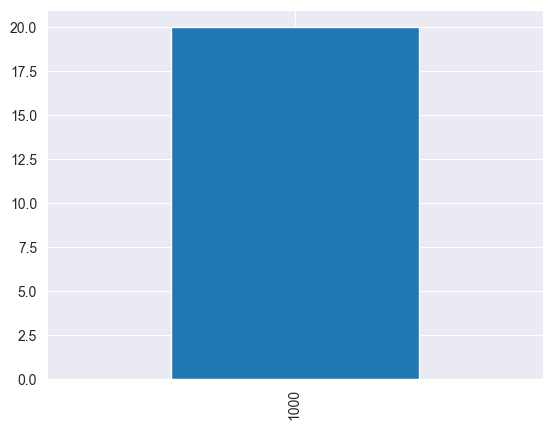

In [159]:
df['formeJuridique'].value_counts().plot(kind='bar')

On observe que la forme juridique la plus représentée est la personne physique.

<AxesSubplot: >

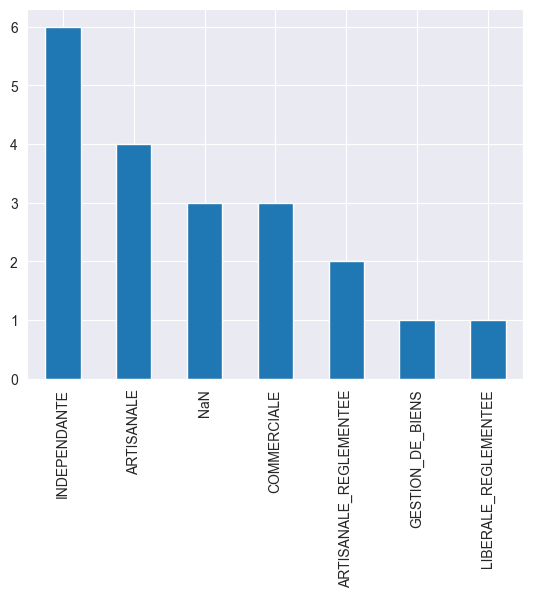

In [163]:
df['formeExerciceActivitePrincipale'].value_counts().plot(kind='bar')

On observe que la forme d'exercice de l'activité principale la plus représentée est la forme individuelle.

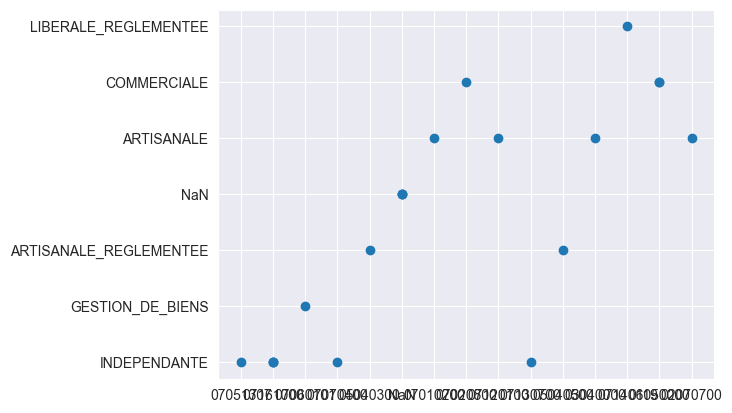

In [170]:
plt.scatter(df['categoryCode'], df['formeExercice'])